In [1]:
import requests, xmltodict, pandas as pd
from zeep import Client, helpers
from datetime import datetime

In [2]:
def listar_ops(wsdl_url):
    c = Client(wsdl=wsdl_url)
    for svc in c.wsdl.services.values():
        for port in svc.ports.values():
            binding = port.binding
            for name, op in binding._operations.items():
                # Nombre de la operación
                args = []
                if op.input and op.input.body and op.input.body.type:
                    args = [elt[0] for elt in op.input.body.type.elements]  # nombres de parámetros
                print(f"{name}({', '.join(args)})")

# Servicio raíz (Cámara)
#listar_ops("https://opendata.camara.cl/wscamaradiputados.asmx?WSDL")
# Servicio Legislativo
#listar_ops("https://opendata.camara.cl/camaradiputados/WServices/WSLegislativo.asmx?WSDL")
# Servicio Diputado / Comisión / Común (si los necesitas)
listar_ops("https://opendata.camara.cl/camaradiputados/WServices/WSDiputado.asmx?WSDL")
#listar_ops("https://opendata.camara.cl/camaradiputados/WServices/WSComision.asmx?WSDL")
#listar_ops("https://opendata.camara.cl/camaradiputados/WServices/WSComun.asmx?WSDL")


retornarDiputados()
retornarDiputado(prmDiputadoId)
retornarDiputadosXPeriodo(prmPeriodoID)
retornarDiputadosPeriodoActual()
retornarDiputados()
retornarDiputado(prmDiputadoId)
retornarDiputadosXPeriodo(prmPeriodoID)
retornarDiputadosPeriodoActual()
retornarDiputados()
retornarDiputado(prmDiputadoId)
retornarDiputadosXPeriodo(prmPeriodoID)
retornarDiputadosPeriodoActual()
retornarDiputados()
retornarDiputado(prmDiputadoId)
retornarDiputadosXPeriodo(prmPeriodoID)
retornarDiputadosPeriodoActual()


In [3]:
c = Client("https://opendata.camara.cl/camaradiputados/WServices/WSDiputado.asmx?WSDL")
res = c.service.retornarDiputadosPeriodoActual()
print(res)

[{
    'FechaInicio': datetime.datetime(2026, 3, 10, 23, 59, 59),
    'FechaTermino': None,
    'Diputado': {
        'Id': 1096,
        'Nombre': 'María Candelaria',
        'Nombre2': None,
        'ApellidoPaterno': 'Acevedo',
        'ApellidoMaterno': 'Sáez',
        'FechaNacimiento': datetime.datetime(1958, 9, 12, 0, 0),
        'FechaDefucion': None,
        'RUT': None,
        'RUTDV': None,
        'Sexo': {
            '_value_1': 'Femenino',
            'Valor': 0
        },
        'Militancias': {
            'Militancia': [
                {
                    'FechaInicio': datetime.datetime(2022, 3, 11, 0, 0),
                    'FechaTermino': datetime.datetime(2026, 3, 10, 23, 59, 59),
                    'Partido': {
                        'Id': 'PC',
                        'Nombre': 'Partido Comunista',
                        'Alias': 'PC'
                    }
                }
            ]
        }
    },
    'Distrito': None
}, {
    'FechaInicio': date

In [5]:
def nombre_completo(r):
    return " ".join([
        r["Nombre"] or "",
        r["Nombre2"] or "",
        r["ApellidoPaterno"] or "",
        r["ApellidoMaterno"] or "",
    ]).strip()

# 1) Personas (una fila por diputada/o)
def flatten_person(r):
    # Normaliza 'Sexo' a dict con llaves esperadas si viene None o faltante
    return {
        "dip_id": r["Id"],                          # asumes que siempre existe
        "nombre": r["Nombre"],
        "nombre2": r["Nombre2"],
        "ap_pat": r["ApellidoPaterno"],
        "ap_mat": r["ApellidoMaterno"],
        "nombre_completo": nombre_completo(r),
        "fecha_nac": r["FechaNacimiento"],
        "fecha_def": r["FechaDefucion"],            # ojo: tu ejemplo usa 'FechaDefucion'
        "rut": r["RUT"],
        "rut_dv": r["RUTDV"]        
    }

df_personas = pd.DataFrame([flatten_person(r) for r in res])
df_personas

KeyError: 'Id'

In [5]:
df_personas.isnull().sum()

dip_id               0
nombre               0
nombre2            554
ap_pat               1
ap_mat               1
nombre_completo      0
fecha_nac          126
fecha_def          554
rut                554
rut_dv             554
sexo                 1
sexo_valor           1
dtype: int64

In [6]:
df_personas.drop(["nombre2", "fecha_def", "rut", "rut_dv"], axis=1, inplace=True)
df_personas.drop(df_personas.tail(1).index,inplace=True)
df_personas

,dip_id,nombre,ap_pat,ap_mat,nombre_completo,fecha_nac,sexo,sexo_valor
0,208,Víctor,Pérez,Varela,Víctor Pérez Varela,1954-10-18,Masculino,1.0
1,485,Jorge,Pizarro,Soto,Jorge Pizarro Soto,NaT,Masculino,1.0
2,684,Sergio,Pizarro,Mackay,Sergio Pizarro Mackay,NaT,Masculino,1.0
3,696,José Alfonso,Rodríguez,Del Río,José Alfonso Rodríguez Del Río,NaT,Masculino,1.0
4,951,David,Sandoval,Plaza,David Sandoval Plaza,1952-10-20,Masculino,1.0
...,...,...,...,...,...,...,...,...
548,1135,Johannes,Kaiser,Barents-Von Hohenhagen,Johannes Kaiser Barents-Von Hohenhagen,1976-01-05,Masculino,1.0
549,1144,Christian,Matheson,Villán,Christian Matheson Villán,1957-12-17,Masculino,1.0
550,1149,Carla,Morales,Maldonado,Carla Morales Maldonado,1977-10-27,Femenino,0.0
551,1185,Arturo,Barrios,Oteíza,Arturo Barrios Oteíza,1967-07-22,Masculino,1.0


In [7]:
# 2) Militancias (una fila por período de militancia)
rows = []
for r in res:
    if r["Militancias"]:
        mil = r["Militancias"]["Militancia"]
        # por si a veces viene un dict en vez de lista, SIN usar .get
        mil_list = mil if isinstance(mil, list) else [mil]
        for m in mil_list:
            rows.append({
                "dip_id": r["Id"],
                "fecha_inicio": m["FechaInicio"],
                "fecha_termino": m["FechaTermino"],
                "partido_id": m["Partido"]["Id"],
                "partido_nombre": m["Partido"]["Nombre"],
                "partido_alias": m["Partido"]["Alias"]
            })
        
df_militancias = pd.DataFrame(rows)
df_militancias

,dip_id,fecha_inicio,fecha_termino,partido_id,partido_nombre,partido_alias
0,208,1990-03-11,1994-03-10 23:59:59,UDI,Unión Demócrata Independiente,UDI
1,208,1998-03-11,2002-03-10 23:59:59,UDI,Unión Demócrata Independiente,UDI
2,208,2002-03-11,2006-03-10 23:59:59,UDI,Unión Demócrata Independiente,UDI
3,208,1994-03-11,1998-03-10 23:59:59,UDI,Unión Demócrata Independiente,UDI
4,485,1990-03-11,1994-03-10 23:59:59,DC,Partido Demócrata Cristiano,DC
...,...,...,...,...,...,...
1267,1135,2025-06-16,2026-03-10 23:59:59,PNL,Partido Nacional Libertario,PNL
1268,1144,2022-03-11,2026-03-10 23:59:59,IND,Independientes,IND
1269,1149,2022-03-11,2026-03-10 23:59:59,RN,Renovación Nacional,RN
1270,1185,2025-05-06,2026-03-10 23:59:59,PS,Partido Socialista,PS


In [8]:
for col in ["fecha_nac", "fecha_def"]:
    if col in df_personas.columns:
        df_personas[col] = pd.to_datetime(df_personas[col], errors="coerce")
for col in ["fecha_inicio", "fecha_termino"]:
    if col in df_militancias.columns:
        df_militancias[col] = pd.to_datetime(df_militancias[col], errors="coerce")

hoy = pd.Timestamp.today().normalize()
if "es_vigente" not in df_militancias.columns:
    df_militancias["es_vigente"] = (
        df_militancias["fecha_inicio"].notna() &
        (df_militancias["fecha_inicio"] <= hoy) &
        (df_militancias["fecha_termino"].isna() | (df_militancias["fecha_termino"] >= hoy))
    )

# --- 1) Número total de militancias por persona ---
df_militancias["n_militancias_total"] = (
    df_militancias.groupby("dip_id")["dip_id"].transform("size")
)
# (Opcional) Orden cronológico de militancias por persona (útil para análisis)
df_militancias = df_militancias.sort_values(["dip_id","fecha_inicio","fecha_termino"])
# (Opcional) Guardar
# df_militancias.to_csv("militancias.csv", index=False, encoding="utf-8-sig", date_format="%Y-%m-%d")
# df_personas.to_csv("personas.csv", index=False, encoding="utf-8-sig", date_format="%Y-%m-%d")


df_militancias.head()

,dip_id,fecha_inicio,fecha_termino,partido_id,partido_nombre,partido_alias,es_vigente,n_militancias_total
571,1,1990-03-11,1994-03-10 23:59:59,DC,Partido Demócrata Cristiano,DC,False,3
573,1,1994-03-11,1998-03-10 23:59:59,DC,Partido Demócrata Cristiano,DC,False,3
572,1,1998-03-11,2002-03-10 23:59:59,DC,Partido Demócrata Cristiano,DC,False,3
574,3,1998-03-11,2002-03-10 23:59:59,RN,Renovación Nacional,RN,False,1
610,8,1998-03-11,2002-03-10 23:59:59,DC,Partido Demócrata Cristiano,DC,False,1


In [9]:
# 4) Partido “actual”: última militancia por persona (según fecha_termino)
if not df_militancias.empty:
    idx_ult = (df_militancias
               .sort_values(["dip_id", "fecha_termino"], na_position="last")
               .groupby("dip_id")
               .tail(1)
               .index)
    df_actual = (df_militancias.loc[idx_ult, ["dip_id","partido_id","partido_nombre","partido_alias", "es_vigente", "n_militancias_total"]]
                 .rename(columns={
                     "partido_id":"partido_actual_id",
                     "partido_nombre":"partido_actual_nombre",
                     "partido_alias":"partido_actual_alias"
                 }))
    df_personas = df_personas.merge(df_actual, on="dip_id", how="left")

print("Militancias:")
print(df_militancias.head())

Militancias:
     dip_id fecha_inicio       fecha_termino partido_id  \
571       1   1990-03-11 1994-03-10 23:59:59         DC   
573       1   1994-03-11 1998-03-10 23:59:59         DC   
572       1   1998-03-11 2002-03-10 23:59:59         DC   
574       3   1998-03-11 2002-03-10 23:59:59         RN   
610       8   1998-03-11 2002-03-10 23:59:59         DC   

                  partido_nombre partido_alias  es_vigente  \
571  Partido Demócrata Cristiano            DC       False   
573  Partido Demócrata Cristiano            DC       False   
572  Partido Demócrata Cristiano            DC       False   
574          Renovación Nacional            RN       False   
610  Partido Demócrata Cristiano            DC       False   

     n_militancias_total  
571                    3  
573                    3  
572                    3  
574                    1  
610                    1  


In [10]:
df_personas

,dip_id,nombre,ap_pat,ap_mat,nombre_completo,fecha_nac,sexo,sexo_valor,partido_actual_id,partido_actual_nombre,partido_actual_alias,es_vigente,n_militancias_total
0,208,Víctor,Pérez,Varela,Víctor Pérez Varela,1954-10-18,Masculino,1.0,UDI,Unión Demócrata Independiente,UDI,False,4
1,485,Jorge,Pizarro,Soto,Jorge Pizarro Soto,NaT,Masculino,1.0,DC,Partido Demócrata Cristiano,DC,False,2
2,684,Sergio,Pizarro,Mackay,Sergio Pizarro Mackay,NaT,Masculino,1.0,DC,Partido Demócrata Cristiano,DC,False,1
3,696,José Alfonso,Rodríguez,Del Río,José Alfonso Rodríguez Del Río,NaT,Masculino,1.0,RN,Renovación Nacional,RN,False,1
4,951,David,Sandoval,Plaza,David Sandoval Plaza,1952-10-20,Masculino,1.0,UDI,Unión Demócrata Independiente,UDI,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,1135,Johannes,Kaiser,Barents-Von Hohenhagen,Johannes Kaiser Barents-Von Hohenhagen,1976-01-05,Masculino,1.0,PNL,Partido Nacional Libertario,PNL,True,3
549,1144,Christian,Matheson,Villán,Christian Matheson Villán,1957-12-17,Masculino,1.0,IND,Independientes,IND,True,1
550,1149,Carla,Morales,Maldonado,Carla Morales Maldonado,1977-10-27,Femenino,0.0,RN,Renovación Nacional,RN,True,1
551,1185,Arturo,Barrios,Oteíza,Arturo Barrios Oteíza,1967-07-22,Masculino,1.0,PS,Partido Socialista,PS,True,1


In [11]:
df_personas.to_csv("diputados.csv", index=False, encoding="utf-8-sig", date_format="%Y-%m-%d")

<Axes: >

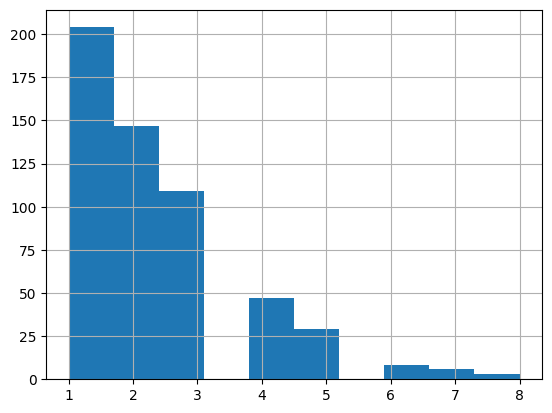

In [42]:
df_personas.n_militancias_total.hist()

In [12]:
df_militancias.head()

,dip_id,fecha_inicio,fecha_termino,partido_id,partido_nombre,partido_alias,es_vigente,n_militancias_total
571,1,1990-03-11,1994-03-10 23:59:59,DC,Partido Demócrata Cristiano,DC,False,3
573,1,1994-03-11,1998-03-10 23:59:59,DC,Partido Demócrata Cristiano,DC,False,3
572,1,1998-03-11,2002-03-10 23:59:59,DC,Partido Demócrata Cristiano,DC,False,3
574,3,1998-03-11,2002-03-10 23:59:59,RN,Renovación Nacional,RN,False,1
610,8,1998-03-11,2002-03-10 23:59:59,DC,Partido Demócrata Cristiano,DC,False,1
